In [54]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [55]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [56]:
# load dataset
dataframe = pandas.read_csv("DONNES/train_cap2018.csv")
dataset = dataframe.values
X = dataset[:,1:58].astype(float)
Y = dataset[:,59]

where_are_NaNs = numpy.isnan(X) #Remplace les valeurs NaN par des 0
X[where_are_NaNs] = 0

print(X)
#Normalisation 

scaler = StandardScaler()
scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
X = scaler.transform(X)
X = scaler.transform(X)

#print(X)
#print(Y)

[[1.600e+01 2.330e+02 1.116e+03 ... 8.800e-01 5.900e-01 2.430e+01]
 [7.000e+00 1.800e+02 8.660e+02 ... 8.900e-01 6.400e-01 2.614e+01]
 [1.000e+01 1.800e+02 8.610e+02 ... 9.200e-01 7.200e-01 3.515e+01]
 ...
 [2.000e+00 2.000e+01 6.300e+01 ... 8.600e-01 9.000e-01 3.699e+01]
 [5.000e+00 2.700e+01 1.070e+02 ... 8.600e-01 8.500e-01 2.942e+01]
 [1.000e+00 3.800e+01 1.740e+02 ... 7.800e-01 7.100e-01 1.682e+01]]


In [57]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

#print(encoded_Y)
#list(encoder.inverse_transform(encoded_Y)) la démarche inverse

In [58]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(10, input_dim=57,kernel_initializer='normal', activation='relu'))
	model.add(Dense(10, activation='relu'))
	model.add(Dense(6, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [59]:
model = baseline_model()
model.fit(X, dummy_y, epochs=150, batch_size=32) #Attention aux paramètres, certains changement provoquent l'overfitting !

Epoch 1/150
27310/27310 [==============================] - 4s 138us/step - loss: 0.9105 - acc: 0.6391
Epoch 2/150
27310/27310 [==============================] - 3s 109us/step - loss: 0.7830 - acc: 0.6908
Epoch 3/150
27310/27310 [==============================] - 3s 120us/step - loss: 0.7736 - acc: 0.6956
Epoch 4/150
27310/27310 [==============================] - 3s 109us/step - loss: 0.7693 - acc: 0.6956
Epoch 5/150
27310/27310 [==============================] - 4s 137us/step - loss: 0.7666 - acc: 0.6992
Epoch 6/150
27310/27310 [==============================] - 3s 122us/step - loss: 0.7615 - acc: 0.7014
Epoch 7/150
27310/27310 [==============================] - 4s 137us/step - loss: 0.7612 - acc: 0.6986
Epoch 8/150
27310/27310 [==============================] - 5s 168us/step - loss: 0.7589 - acc: 0.7003
Epoch 9/150
27310/27310 [==============================] - 5s 168us/step - loss: 0.7552 - acc: 0.7016
Epoch 10/150
27310/27310 [==============================] - 4s 145us/step - loss: 

27310/27310 [==============================] - 3s 100us/step - loss: 0.7229 - acc: 0.7122
Epoch 80/150
27310/27310 [==============================] - 3s 110us/step - loss: 0.7230 - acc: 0.7147 0s - loss: 0.7219 - acc: 
Epoch 81/150
27310/27310 [==============================] - 3s 110us/step - loss: 0.7236 - acc: 0.7115
Epoch 82/150
27310/27310 [==============================] - 3s 101us/step - loss: 0.7228 - acc: 0.7128
Epoch 83/150
27310/27310 [==============================] - 3s 92us/step - loss: 0.7213 - acc: 0.7129
Epoch 84/150
27310/27310 [==============================] - 2s 90us/step - loss: 0.7220 - acc: 0.7152: 0s - loss: 0.7222 - acc:
Epoch 85/150
27310/27310 [==============================] - 3s 92us/step - loss: 0.7216 - acc: 0.7132
Epoch 86/150
27310/27310 [==============================] - 3s 107us/step - loss: 0.7211 - acc: 0.7151
Epoch 87/150
27310/27310 [==============================] - 3s 111us/step - loss: 0.7210 - acc: 0.7129
Epoch 88/150
27310/27310 [===========

In [15]:
# evaluate the model
scores = model.evaluate(X, dummy_y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

27310/27310 [==============================] - 2s 55us/step

acc: 73.64%


In [50]:
#predictions = model.predict(X)
predictions = model.predict_classes(X)
classes = encoder.inverse_transform(predictions)

print(classes)
# round predictions
#for x in predictions :
#    print(x)
#print(dummy_y)

['B2' 'B2' 'B2' ... 'A1' 'A1' 'A1']


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


<class 'numpy.ndarray'>


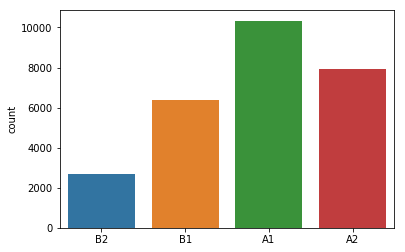

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

print(type(classes))
sns.countplot(classes,label="Count")
plt.show()